# Bài 1: Logical thinking
Tú là một người bán hàng và đang muốn bán mĩ phẩm online. Sau một hồi nghiên cứu tìm hiểu thì anh ta quyết định lựa chọn bán hàng trên một sàn thương mại điện tử tên là ABC.vn vì đây có vẻ là một sàn thương mại điện tử uy tín. Tuy nhiên anh ta còn đang băn khoăn không biết rằng liệu tổng số đơn hàng và doanh thu mà anh ta sẽ kiếm được thông qua website ABC.vn liệu sẽ là bao nhiêu và muốn nhận được tư vấn từ team ABC.vn. Với vai trò là data analyst của ABC.vn và bạn có quyền truy cập kho dữ liệu của ABC.vn (bao gồm thông tin các đơn hàng, mặt hàng, giá trị đơn hàng, v.v.), bạn sẽ ước lượng doanh số bán hàng thông trên ABC.vn cho Tú như thế nào?
Hãy tự đưa ra những giả định cần thiết để phục vụ cho câu trả lời của bạn.

1. Trình bày tình hình phát triển kinh doanh trước cho Tú:
+ Doanh thu theo thời gian
+ Lượng người bán và người mua theo thời gian <p>
__=> Tác động đến việc lực chọn sàn TMDT ABC__

2. Trình bày tình hình kinh doanh của nhóm sản phẩm mỹ phẩm:
+ Lượng người bán, người mua theo thời gian
+ Doanh thu của nhóm hàng mỹ phẫm, nhu cầu sử dụng mỹ phẫm tăng lên theo thời gian __=> Mặt hàng có triễn vọng__
+ Có thê chia ra nhóm sản phâm theo từng phân khúc giá khác nhau để phân tích về sức cầu đối với từng nhóm.

3. Để ước lượng doanh số bán hàng, ta có những cách sau: <p>

Vì là người mới nên so sánh các tài khoản bán hàng lâu năm nhằm đưa ra số liệu doanh số không chính xác, ta cần: <p>
    + Chia tệp người bán mỹ phẫm ra thành nhiều nhóm khác nhau theo thời gian tồn tại tài khoản, ví dụ nhóm tài khoản trên 1 năm, 6 tháng, 3 tháng, 1 tháng, thành các tên gọi khác nhau và xác định xem Tú nằm ở nhóm người bán nào để phân tích chính xác hơn. <p> 
    
Từ tập dữ liệu người bán hàng tương đồng với Tú, ta tiến hành phân tích: <p>
    + Doanh thu, doanh số chung của nhóm người bán này. Cụ thể, tuần đầu tiên, trung bình họ bán được bao nhieu cái, tuần thứ 2, ... <p>
    + Phân tích này còn làm rõ hơn thông qua các filter như nhóm sản phẩm theo phân khúc giá, có áp dụng quảng cáo hay không,.. <p>
    + Phân tích theo ngày thường, ngày cuối tuần, theo khung giờ cao điểm hay theo mùa để đánh giá được tương lai.<p>
    + Khi lên cấp thành nhóm người bán lâu năm thì ước tính sự phát triển qua các con số. <p>

Các khảo sát trên thuộc định lượng thheo các mốc giá trị hoặc qua cái nhìn tổng quan chung, ta có thể xây dựng các hôi mô hình học máy hồi quy để đưa ra con số chính xác hơn theo các thông số sau: <p>


# Bài 2:

# Import thư viện và chuẩn bị dữ liệu

In [887]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import math 
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [888]:
df = pd.read_csv(r'D:\DATA ANALYST COURSES\MINX COURSES\Course 2 BI\Final exam\3.Logical thinking and mini case study\data_ecommerce.csv')

In [889]:
df.head()

,Seller ID,Seller's Main Category,Sign-up Time,Activation Time,1st Listing,1st Salable,1st Transaction
0,1,Electronic,9/20/2017,2/2/2018,2/7/2018,10/6/2018,10/10/2018
1,2,BBFF,8/19/2017,5/24/2018,8/13/2018,8/14/2018,9/2/2018
2,3,BBFF,12/4/2017,5/4/2018,10/6/2018,10/10/2018,10/12/2018
3,4,BBFF,10/16/2017,4/23/2018,7/4/2018,7/10/2018,7/10/2018
4,5,BBFF,12/13/2017,7/25/2018,8/30/2018,8/31/2018,9/14/2018


Kiểm tra thông tin chung, kiểu dữ liệu và lỗi trước

In [890]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Seller ID               2145 non-null   int64 
 1   Seller's Main Category  2145 non-null   object
 2   Sign-up Time            2145 non-null   object
 3   Activation Time         2145 non-null   object
 4   1st Listing             2145 non-null   object
 5   1st Salable             2145 non-null   object
 6   1st Transaction         2145 non-null   object
dtypes: int64(1), object(6)
memory usage: 117.4+ KB


In [891]:
df.isnull().sum()

Seller ID                 0
Seller's Main Category    0
Sign-up Time              0
Activation Time           0
1st Listing               0
1st Salable               0
1st Transaction           0
dtype: int64

In [892]:
df['Seller ID'].duplicated().sum()

0

In [893]:
# Đổi kiểu dữ liệu cột thời gian
df['Sign-up Time'] = pd.to_datetime(df['Sign-up Time'])
df['Activation Time'] = pd.to_datetime(df['Activation Time'])
df['1st Listing'] = pd.to_datetime(df['1st Listing'])
df['1st Salable'] = pd.to_datetime(df['1st Salable'])
df['1st Transaction'] = pd.to_datetime(df['1st Transaction'])
df.dtypes

Seller ID                          int64
Seller's Main Category            object
Sign-up Time              datetime64[ns]
Activation Time           datetime64[ns]
1st Listing               datetime64[ns]
1st Salable               datetime64[ns]
1st Transaction           datetime64[ns]
dtype: object

In [894]:
df.head()

,Seller ID,Seller's Main Category,Sign-up Time,Activation Time,1st Listing,1st Salable,1st Transaction
0,1,Electronic,2017-09-20,2018-02-02,2018-02-07,2018-10-06,2018-10-10
1,2,BBFF,2017-08-19,2018-05-24,2018-08-13,2018-08-14,2018-09-02
2,3,BBFF,2017-12-04,2018-05-04,2018-10-06,2018-10-10,2018-10-12
3,4,BBFF,2017-10-16,2018-04-23,2018-07-04,2018-07-10,2018-07-10
4,5,BBFF,2017-12-13,2018-07-25,2018-08-30,2018-08-31,2018-09-14


# Tìm hiểu tập dữ liệu

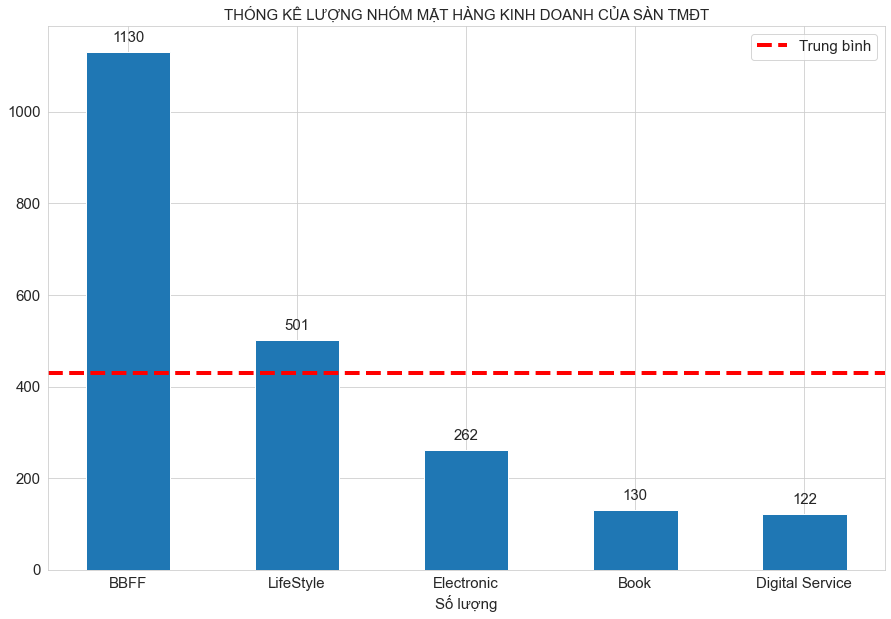

BBFF               1130
LifeStyle           501
Electronic          262
Book                130
Digital Service     122
Name: Seller's Main Category, dtype: int64

In [895]:
# Thống kế lượng nhóm sản phẩm kinh doanh và số lượng của nó
temp_table = df["Seller's Main Category"].value_counts()
xs = temp_table.index
ys = temp_table.values

plt.figure(figsize=(15,10))
plt.bar(xs,ys,width=0.5)
plt.axhline(ys.mean(),color='red',label='Trung bình',linestyle='--',linewidth=4)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Nhóm mặt hàng',fontsize=15)
plt.xlabel('Số lượng',fontsize=15)
plt.title('THỐNG KÊ LƯỢNG NHÓM MẶT HÀNG KINH DOANH CỦA SÀN TMĐT',fontsize=15)
for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, # Dữ liệu số 
                (x,y), # Tọa độ định vị nhãn 
                textcoords='offset points', # Vị trí text
                xytext=(0,10), # Khoảng cách từ text đến point
                ha='center',fontsize=15) # Horizontal alignment can be left, right or center
plt.legend(prop={'size': 15})

plt.show();
temp_table

Số lượng nhóm mặt hàng được đăng ký bán là: (TỔNG SỐ LƯỢNG = 2145 NHÀ KINH DOANH) <p> 
    + BBFF <p>
    + Phong cách sống <p>
    + Thiết bị điện tử <p>
    + Sách <p>
    + Dịch vụ kỹ thuật số <p>

### Sign-up Time: Thời gian người bán hàng đăng ký trên website

In [896]:
df['Sign-up Time']

0      2017-09-20
1      2017-08-19
2      2017-12-04
3      2017-10-16
4      2017-12-13
          ...    
2140   2018-10-04
2141   2018-10-10
2142   2018-09-18
2143   2018-10-04
2144   2018-10-05
Name: Sign-up Time, Length: 2145, dtype: datetime64[ns]

In [897]:
df['Sign-up Month'] = df['Sign-up Time'].dt.month
df['Sign-up Year'] = df['Sign-up Time'].dt.year
df['Sign-up Day'] = df['Sign-up Time'].dt.day

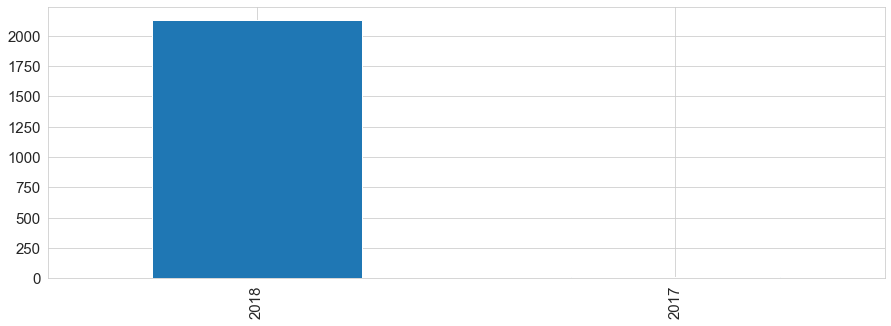

In [898]:
df['Sign-up Year'].value_counts().plot(kind='bar',figsize=(15,5));
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

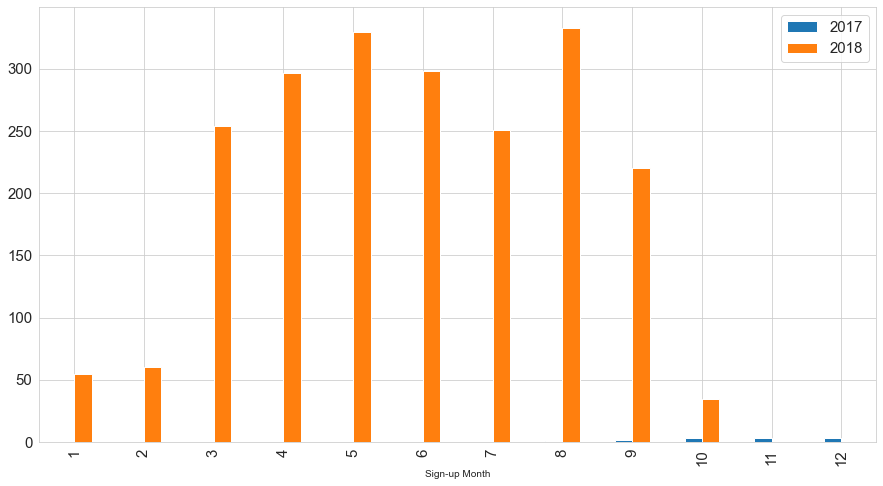

Sign-up Year,2017,2018,Total
Sign-up Month,,,
1,nan,55,55
2,nan,60,60
3,nan,254,254
4,nan,297,297
5,nan,330,330
6,nan,298,298
7,nan,251,251
8,1,333,334
9,2,220,222


In [899]:
temp_table = pd.pivot_table(data=df,index='Sign-up Month',columns='Sign-up Year',values='Seller ID',
                                aggfunc='count',margins=True,margins_name='Total')
temp_table.iloc[:-1,:-1].plot(kind='bar',figsize=(15,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size':15})
plt.show()
temp_table.iloc[:-1].style.background_gradient(cmap='coolwarm').set_precision(0)

Người bán hàng tăng mạnh từ tháng 3 đến tháng 9, đạt đỉnh ở tháng 5 và tháng 8. <p>
__==> Do sàn TMDT ABC sau khoảng thời gian bắt đầu hình thành thì thời gian hoạt động ổn định từ tháng 3, sau khi các hoạt động marketing diễn ra, nhiều người bán hàng biết đến và đã đăng ký. Vì dữ liệu chỉ 1 năm nên ta không thể suy luận xu hướng theo mùa được.__ <p>

In [900]:
# Tại sao tháng 10 lại ít người bán hàng đăng ký vậy?
df.loc[(df['Sign-up Month'] == 10) & (df['Sign-up Year'] == 2018)]['Sign-up Day'].value_counts()

5     8
4     7
3     5
2     5
9     4
1     3
10    2
6     1
Name: Sign-up Day, dtype: int64

Dữ liệu tháng 10 chỉ được thu thập đến ngày 10 nên thống kê trong tháng 10 rất ít (38 người đăng ký mới). <p>
Để làm rõ hơn sự giảm sâu này, ta có thể so sánh với các tháng khác cùng kì để nhìn ra được liệu tháng 10 này có bất ổn hay đây là một điều bình thường ttrong các tháng.

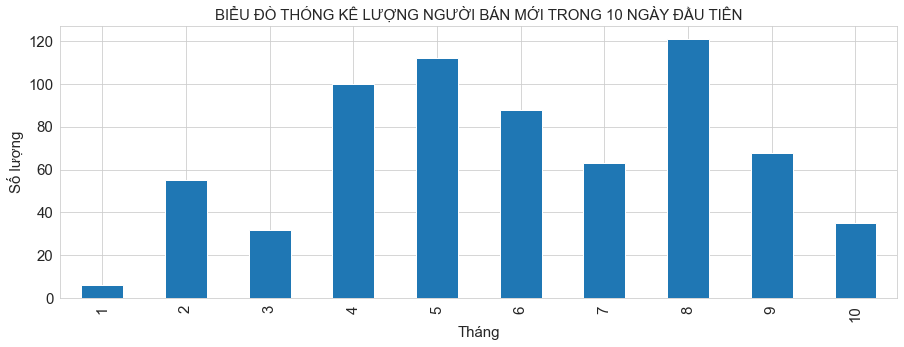

,Sign-up Month
1,6
2,55
3,32
4,100
5,112
6,88
7,63
8,121
9,68
10,35


In [901]:
temp_table = df.loc[(df['Sign-up Day'] <= 10) & (df['Sign-up Year'] == 2018)]
temp_table['Sign-up Month'].value_counts().sort_index().plot(kind='bar',figsize=(15,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Tháng',fontsize=15)
plt.ylabel('Số lượng',fontsize=15)
plt.title('BIỂU ĐỒ THỐNG KÊ LƯỢNG NGƯỜI BÁN MỚI TRONG 10 NGÀY ĐẦU TIÊN',fontsize=15)
plt.show()
temp_table = pd.DataFrame(temp_table['Sign-up Month'].value_counts().sort_index())
temp_table.style.background_gradient(cmap='coolwarm').set_precision(2)

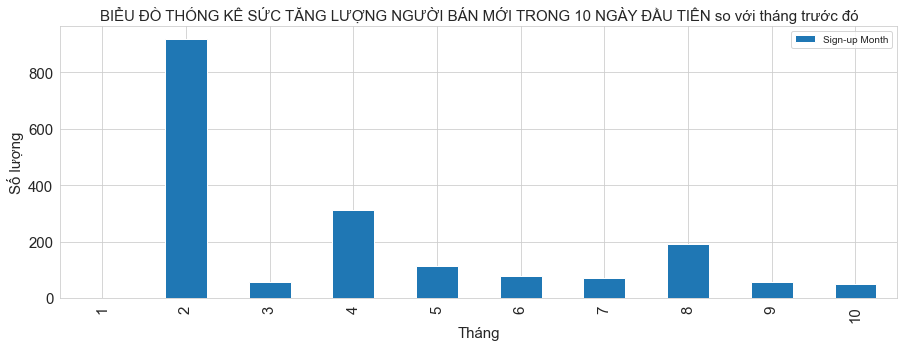

,Sign-up Month
1,nan
2,916.67
3,58.18
4,312.50
5,112.00
6,78.57
7,71.59
8,192.06
9,56.20
10,51.47


In [902]:
((temp_table/temp_table.shift(1))*100).plot(kind='bar',figsize=(15,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Tháng',fontsize=15)
plt.ylabel('Số lượng',fontsize=15)
plt.title('BIỂU ĐỒ THỐNG KÊ SỨC TĂNG LƯỢNG NGƯỜI BÁN MỚI TRONG 10 NGÀY ĐẦU TIÊN so với tháng trước đó',fontsize=15)
plt.show()
((temp_table/temp_table.shift(1))*100).style.background_gradient(cmap='coolwarm').set_precision(2)

Quan sát biểu đồ vá bảng tăng trường cùng kỳ (10 ngày đầu tháng), ta thấy rằng: <p>
    - Các tháng sau giai đoạn khởi đầu (sau tháng 3) tăng trưởng khá mạnh. <p>
    - Kể từ tháng 9 trở đi thì 7 ngày đầu tiên có sự biến động, tỉ lệ tăng trưởng 10 ngày đầu tháng giảm rõ rệt. <p>
__==> Ta cần tìm ra vấn đề đó là gì và cách khắc phục, cải thiện__

Vì tập dữ liệu giới hạn về mặt nội dung, khía cạnh nên ta chỉ tập trung phân tích vào các khoảng thời gian để người bán hàng có thể bán hàng và thu lại lợi nhuận đầu tiên.

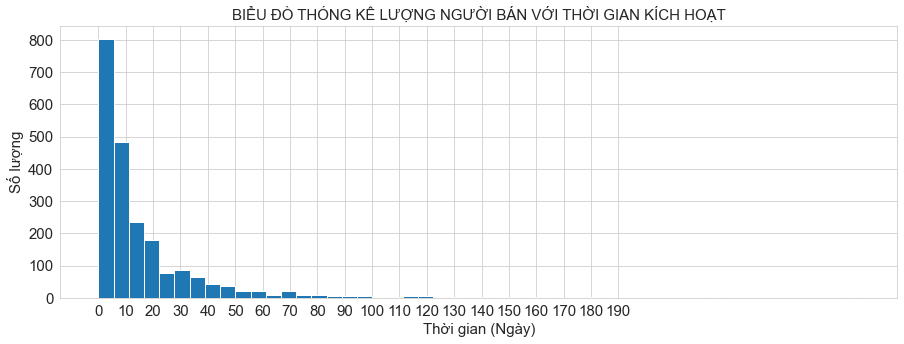

In [903]:
# Tạo 1 cột thời gian chờ đến ngày kích hoạt
df['Thời gian kích hoạt'] = df['Activation Time'] - df['Sign-up Time']
# df['Thời gian kích hoạt'] = str(df['Thời gian kích hoạt'])
df['Thời gian kích hoạt'] = df['Thời gian kích hoạt'].dt.total_seconds()/86400

plt.figure(figsize=(15,5))
plt.hist(df['Thời gian kích hoạt'],bins=50)
plt.xticks(np.arange(0,200,10),fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Thời gian (Ngày)',fontsize=15)
plt.ylabel('Số lượng',fontsize=15)
plt.title('BIỂU ĐỒ THỐNG KÊ LƯỢNG NGƯỜI BÁN VỚI THỜI GIAN KÍCH HOẠT',fontsize=15)
plt.show()

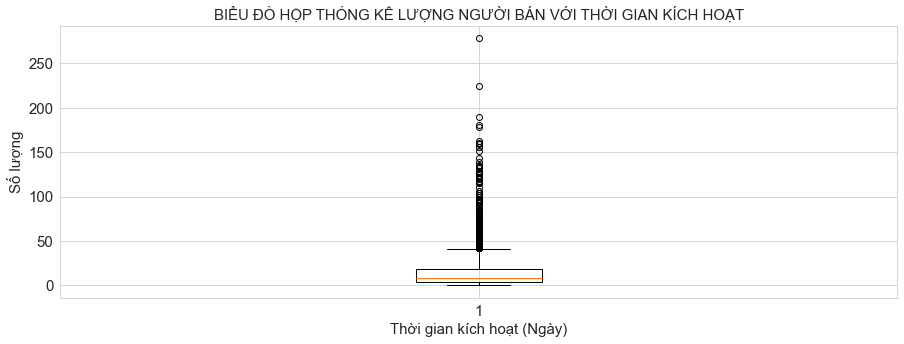

In [904]:
plt.figure(figsize=(15,5))

plt.boxplot(df['Thời gian kích hoạt'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Thời gian kích hoạt (Ngày)',fontsize=15)
plt.ylabel('Số lượng',fontsize=15)
plt.title('BIỂU ĐỒ HỘP THỐNG KÊ LƯỢNG NGƯỜI BÁN VỚI THỜI GIAN KÍCH HOẠT',fontsize=15)
plt.show()

__==> Biểu đồ hộp cho thấy lượng người dùng có thời gian chờ ngày kích hoạt rất bất thường (outlier), biến động trước giá trị trung vị bé (vì lượng người bán hàng có thời gian chờ phổ biến ở mức này) và phân tán rộng sau giá trị trung vị.__

Quan sát biểu đồ trên, ta thấy rằng phần lớn người bán sẽ chỉ phải chờ 0 đến 10 ngày trở lại để được kích hoạt tài khoản bán hàng trên sàn TMDT.
__==> Phần lớn là số lượng này, tuy nhiên vẫn còn một số lượng không nhỏ phải chờ từ 20 ngày đến 2 tháng, có những trường hợp đặc biệt chờ đến 4 tháng thì tài khoản mới được kích hoạt.__ <p>
__==> Vấn đề còn tồn đọng trong việc đưa ra quyết định kích hoạt tài khoản người bán hàng__ <p>
Những lí do sau đây cần lư tâm:  <p>
- Do số lượng tài khoản người bán đăng ký mới quá lớn nên lực lượng nhân viên ko đủ, ko kịp đáp ứng số lượng lớn này 1 cách nhanh chóng, đúng thời hạn. <p>
__==> Chia nhóm chờ ra thành 3 nhóm (nhanh, trung bình và chậm) để phân tích kĩ hơn.__

In [905]:
df.loc[df['Thời gian kích hoạt'] <= 10,'Loại chờ kích hoạt'] = 'Nhanh'
df.loc[(df['Thời gian kích hoạt'] > 10) & (df['Thời gian kích hoạt'] <= 30),'Loại chờ kích hoạt'] = 'Trung bình'
df.loc[df['Thời gian kích hoạt'] > 30,'Loại chờ kích hoạt'] = 'Chậm'

In [906]:
# Thống kê lại lượng người dùng
temp_table = pd.DataFrame(df['Loại chờ kích hoạt'].value_counts())
temp_table.style.background_gradient(cmap='coolwarm')

,Loại chờ kích hoạt
Nhanh,1223
Trung bình,595
Chậm,327


In [907]:
(temp_table/temp_table.sum()*100).style.background_gradient(cmap='coolwarm').set_precision(2)

,Loại chờ kích hoạt
Nhanh,57.02
Trung bình,27.74
Chậm,15.24


__=>> Mức độ chậm là khá nhiều__

In [908]:
# Thống kê theo tháng trong 
temp_table = pd.pivot_table(data=df,index=['Sign-up Month'],columns='Loại chờ kích hoạt',values='Seller ID',
                            aggfunc='count',fill_value=0)
temp_table.style.background_gradient(cmap='coolwarm')

Loại chờ kích hoạt,Chậm,Nhanh,Trung bình
Sign-up Month,,,
1,28,13,14
2,24,4,32
3,26,149,79
4,63,129,105
5,80,154,96
6,65,122,111
7,20,150,81
8,10,271,53
9,2,196,24


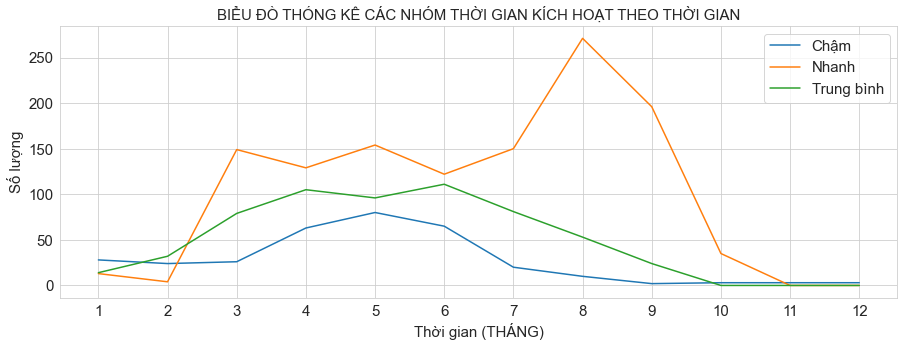

In [909]:
temp_table.plot(figsize=(15,5))
plt.xticks(np.arange(1,13,1),fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Thời gian (THÁNG)',fontsize=15)
plt.ylabel('Số lượng',fontsize=15)
plt.title('BIỂU ĐỒ THỐNG KÊ CÁC NHÓM THỜI GIAN KÍCH HOẠT THEO THỜI GIAN',fontsize=15)
plt.legend(prop={'size':15})
plt.show()

Đối với thông số này, ta nhận dạng tín hiệu tốt như sau: <p>
    + Nhanh càng lớn __=> Càng tốt__ <p>
    + Trung bình và chậm càng lớn __=> Càng xấu__ <p>
Ta thấy rằng: <p>
 + Ngày kích hoạt nhóm nhanh tăng theo thời gian (tăng mạnh ở tư tháng 7 về sau) __=> tín hiệu tốt__ <p>
 + Ngày kích hoạt nhóm trung bình và chậm giảm xuống rõ từ tháng 7 về sau __=> Tín hiệu tốt__ <p>
__==> Ở tháng 9 và 10, do lượng người dùng mới tăng ít nên các chỉ số này giảm theo là điều hiển nhiên, nhưng giảm ở tháng 7 và tháng 8 thì đây là tín hiệu khả quan đới với sàn TMDT ABC sắp tới.__


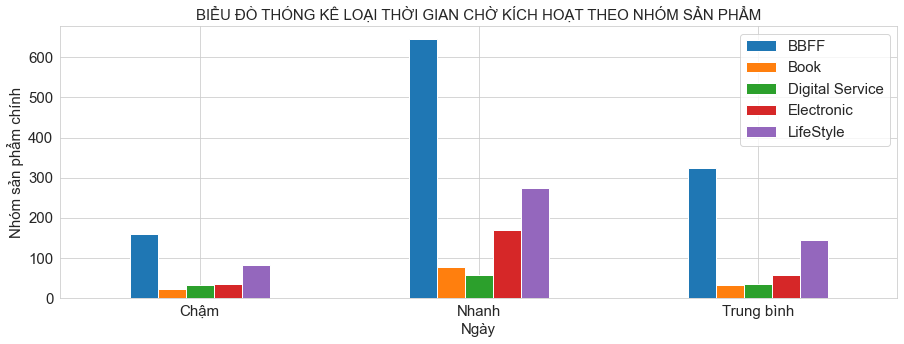

Loại chờ kích hoạt,Chậm,Nhanh,Trung bình
Seller's Main Category,,,
BBFF,159,646,325
Book,21,77,32
Digital Service,31,56,35
Electronic,35,169,58
LifeStyle,81,275,145


In [910]:
# Đâu là nhóm hàng có thời gian chờ kích hoạt chậm và trung bình nhiều nhất
temp_table = pd.pivot_table(data=df,index="Loại chờ kích hoạt",columns="Seller's Main Category",values='Seller ID',fill_value=0,aggfunc='count')

temp_table.plot(kind='bar',figsize=(15,5))
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Ngày',fontsize=15)
plt.ylabel('Nhóm sản phẩm chính',fontsize=15)
plt.title('BIỂU ĐỒ THỐNG KÊ LOẠI THỜI GIAN CHỜ KÍCH HOẠT THEO NHÓM SẢN PHẨM',fontsize=15)
plt.legend(prop={'size':15},loc='best')
plt.show()

temp_table.T.style.background_gradient(cmap='coolwarm').set_precision(2)

Vì nhóm hàng BBFF chiếm số lượng lớn nên 3 nhóm thời gian chờ đều đứng đầu về lượng khách hàng.
+ Xếp sau là nhóm phong cách sống về loại chờ kích hoạt chậm
+ Lượt sau đó là TB điện, dịch vụ kỹ thuật số và thấp nhất là sách.

In [911]:
(temp_table/temp_table.sum()*100).style.background_gradient(cmap='coolwarm').set_precision(2)

Seller's Main Category,BBFF,Book,Digital Service,Electronic,LifeStyle
Loại chờ kích hoạt,,,,,
Chậm,14.07,16.15,25.41,13.36,16.17
Nhanh,57.17,59.23,45.90,64.50,54.89
Trung bình,28.76,24.62,28.69,22.14,28.94


Tuy nhiên đối với các nhóm hàng thì tỉ lệ nhóm thời gian kích hoạt chậm vẫn thấp nhất. <p>
__==> Tỉ lệ này vẫn còn khá cao (trên 10%, có nhóm 20%), ta cần có triễn khai nâng cấp hệ thống tiếp nhận đơn đăng ký bán hàng nhằm tăng tốc độ xử lý cũng như lưu trữ, cần sắp xếp nhân viên phê duyệt nhiều hơn để kịp đáp ứng lượng người đăng ký tăng đột biến trong bối cảnh sàn TMDT đang ngày càng phát triển, thu hút người bán hàng tham gia.__

### 1st Listing:  Thời gian đầu tiên mà người bàn được up hình và nội dung sản phẩm lên web

Thông số này ta cần xem xét thời gian giữa ngày phê duyệt (kích hoạt) và ngày được up nội dung bán hàng. <p>
__=> Thường thì số ngày chờ sẽ ngang nhau, vì việc phê duyệt quyển up hình sẽ dc xử lý tự động__

In [912]:
df['Thời gian chờ up nội dung'] = df['1st Listing'] - df['Activation Time']
df['Thời gian chờ up nội dung'] = df['Thời gian chờ up nội dung'].dt.total_seconds()/86400
df[df['Thời gian chờ up nội dung'] < 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 16 to 2141
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Seller ID                  424 non-null    int64         
 1   Seller's Main Category     424 non-null    object        
 2   Sign-up Time               424 non-null    datetime64[ns]
 3   Activation Time            424 non-null    datetime64[ns]
 4   1st Listing                424 non-null    datetime64[ns]
 5   1st Salable                424 non-null    datetime64[ns]
 6   1st Transaction            424 non-null    datetime64[ns]
 7   Sign-up Month              424 non-null    int64         
 8   Sign-up Year               424 non-null    int64         
 9   Sign-up Day                424 non-null    int64         
 10  Thời gian kích hoạt        424 non-null    float64       
 11  Loại chờ kích hoạt         424 non-null    object        
 12  Thời g

In [913]:
print('Phần trăm dữ liệu lỗi: ',round(len(df[df['Thời gian chờ up nội dung'] < 0])/len(df)*100,2))

Phần trăm dữ liệu lỗi:  19.77


Dữ liệu ngày up nội dung dường như được thu thập không chính xác khi mà ngày up nội dung sản phẩm lại trước ngày tài khoản được kích hoạt. <p>
__=> Loại bỏ các tài khoản này trước khi phân tích__

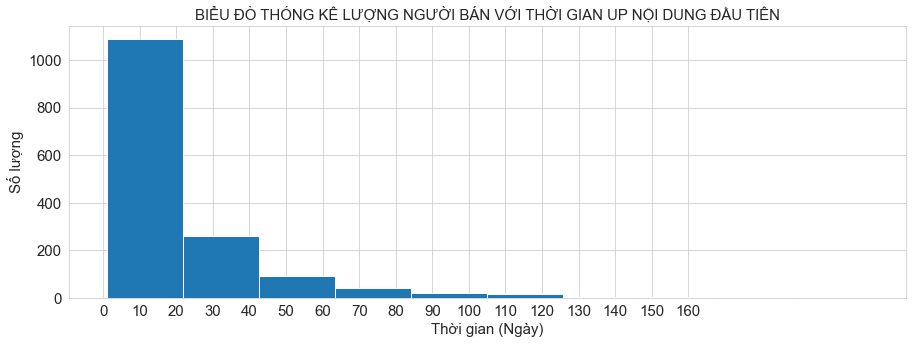

In [914]:
df_loc_up = df.loc[df['Thời gian chờ up nội dung'] > 0]
# Thống kê tần suất ngày chờ up nội dung
plt.figure(figsize=(15,5))
plt.hist(df_loc_up['Thời gian chờ up nội dung'])
plt.xticks(np.arange(0,170,10),fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Thời gian (Ngày)',fontsize=15)
plt.ylabel('Số lượng',fontsize=15)
plt.title('BIỂU ĐỒ THỐNG KÊ LƯỢNG NGƯỜI BÁN VỚI THỜI GIAN UP NỘI DUNG ĐẦU TIÊN',fontsize=15)
plt.show()

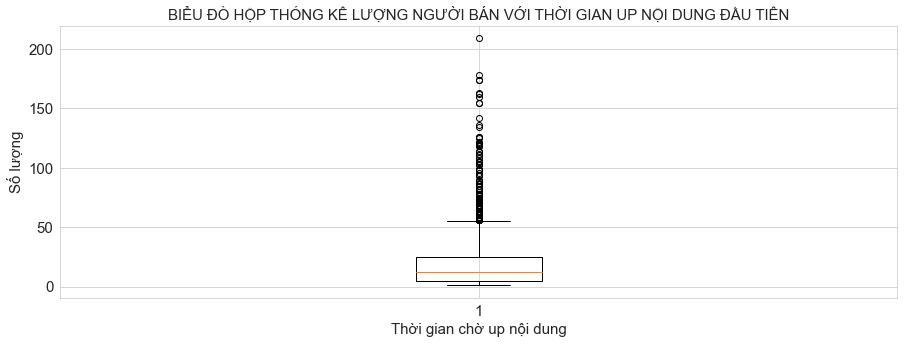

In [915]:
plt.figure(figsize=(15,5))
plt.boxplot(df_loc_up['Thời gian chờ up nội dung'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Thời gian chờ up nội dung',fontsize=15)
plt.ylabel('Số lượng',fontsize=15)
plt.title('BIỂU ĐỒ HỘP THỐNG KÊ LƯỢNG NGƯỜI BÁN VỚI THỜI GIAN UP NỘI DUNG ĐẦU TIÊN',fontsize=15)
plt.show()

Quan sát 2 biểu đồ trên, ta thấy rằng: 
+ Phần lớn thời gian chờ trong vòng 25 ngày kể từ ngày tài khoản được kích hoạt
+ Sự biến độn trên giá trị trung vị là nhiều hơn dưới giá trị trung vị __==> những giá trị lớn hơn có mức độ phân tán rãi rác mà không tạo thành 1 mốc thời điểm, thời gian chủ yếu.__
+ Biểu đồ hộp cho rằng có rất nhiều giá trị ngoại vi (outlier) <p>
__==> Ta sẽ chia ra thành 3 nhóm để dễ đánh giá __ <p>
    + Nhóm 1: Nhanh 0->20 ngày <p>
    + Nhóm 2: Trung bình 20->40 ngày <p>
    + Nhóm 3: Trễ trên 40 ngày <p>

In [916]:
df_loc_up.loc[df_loc_up['Thời gian chờ up nội dung'] <= 20,'Loại chờ up nội dung'] = 'Nhanh'
df_loc_up.loc[(df_loc_up['Thời gian chờ up nội dung'] > 20) & (df_loc_up['Thời gian chờ up nội dung'] <= 40),'Loại chờ up nội dung'] = 'Trung bình'
df_loc_up.loc[df_loc_up['Thời gian chờ up nội dung'] > 40,'Loại chờ up nội dung'] = 'Chậm'

Vì dữ liệu này lấy mốc thời gian của ngày kích hoạt nên ta sẽ thống kê theo thời gian của ngày kích hoạt

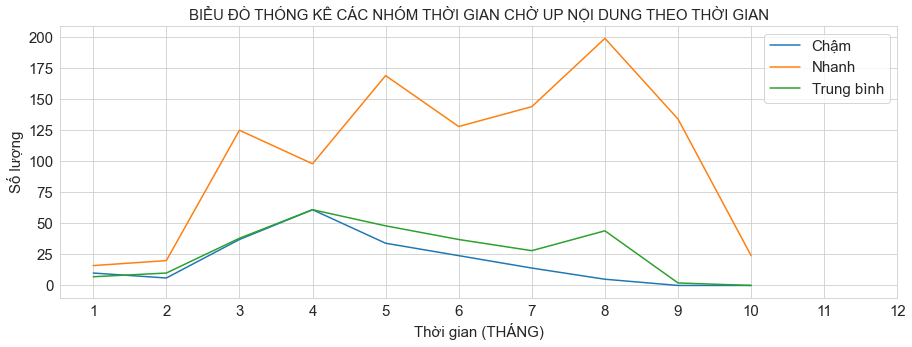

Loại chờ up nội dung,Chậm,Nhanh,Trung bình
Sign-up Month,,,
1,10,16,7
2,6,20,10
3,37,125,38
4,61,98,61
5,34,169,48
6,24,128,37
7,14,144,28
8,5,199,44
9,0,134,2


In [917]:
temp_table = pd.pivot_table(data=df_loc_up.loc[df_loc_up['Sign-up Year'] == 2018],index='Sign-up Month',
                                columns='Loại chờ up nội dung',values='Seller ID',fill_value=0,aggfunc='count')
temp_table.plot(figsize=(15,5))
plt.xticks(np.arange(1,13,1),fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Thời gian (THÁNG)',fontsize=15)
plt.ylabel('Số lượng',fontsize=15)
plt.title('BIỂU ĐỒ THỐNG KÊ CÁC NHÓM THỜI GIAN CHỜ UP NỘI DUNG THEO THỜI GIAN',fontsize=15)
plt.legend(prop={'size':15})
plt.show();         

temp_table.style.background_gradient(cmap='coolwarm')     

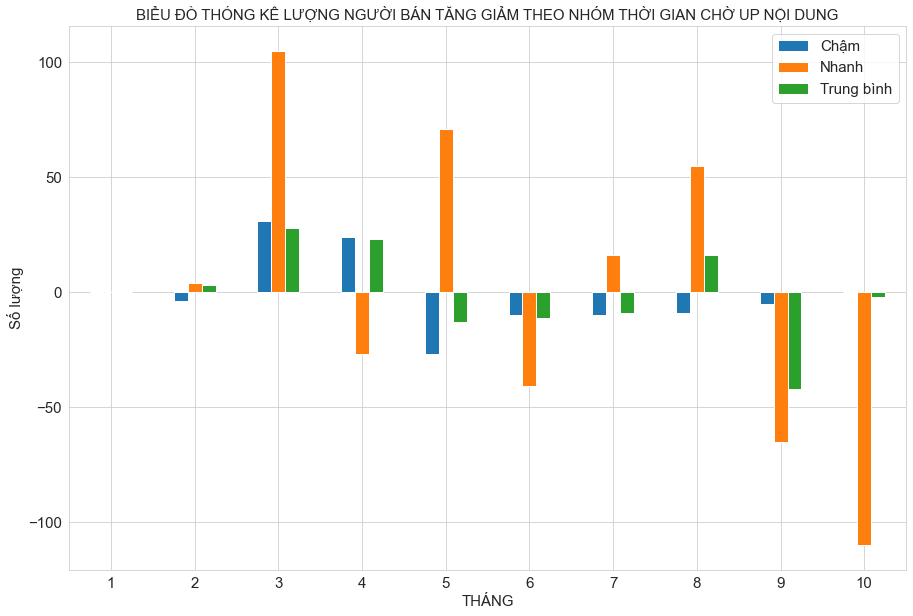

In [918]:
(temp_table-temp_table.shift(1)).plot(kind='bar',figsize=(15,10))
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('THÁNG',fontsize=15)
plt.ylabel('Số lượng',fontsize=15)
plt.title('BIỂU ĐỒ THỐNG KÊ LƯỢNG NGƯỜI BÁN TĂNG GIẢM THEO NHÓM THỜI GIAN CHỜ UP NỘI DUNG',fontsize=15)
plt.legend(prop={'size':15},loc='best')
plt.show()

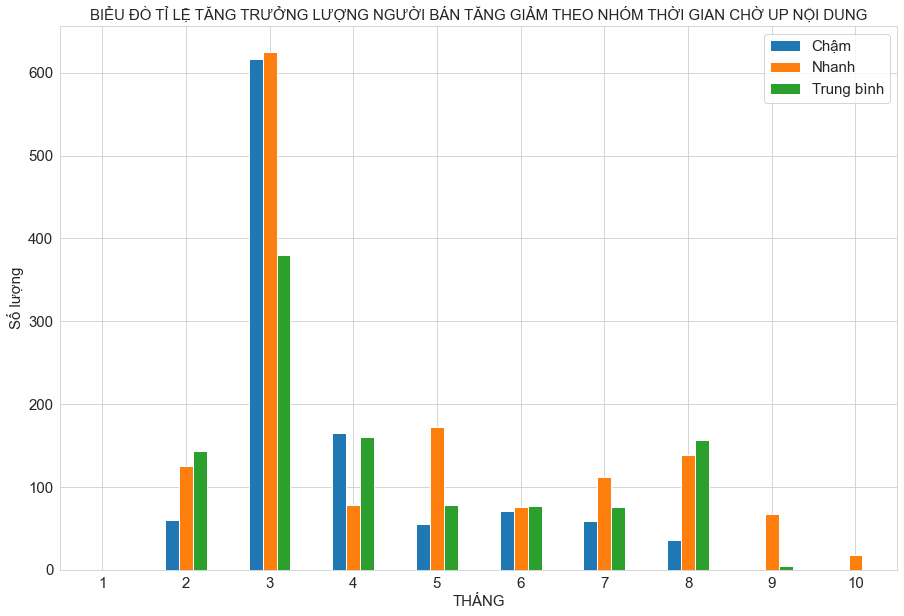

In [919]:
round((temp_table/temp_table.shift(1)*100),2).plot(kind='bar',figsize=(15,10))
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('THÁNG',fontsize=15)
plt.ylabel('Số lượng',fontsize=15)
plt.title('BIỂU ĐỒ TỈ LỆ TĂNG TRƯỞNG LƯỢNG NGƯỜI BÁN TĂNG GIẢM THEO NHÓM THỜI GIAN CHỜ UP NỘI DUNG',fontsize=15)
plt.legend(prop={'size':15},loc='best')
plt.show()

Quan sát 3 biểu đồ trên, ta thấy rằng:
+ Số lượng người bán được duyệt up hình sớm (nhanh) vẫn tăng nhưng mức tăng không không mạnh, đạt đỉnh vào tháng 3 nhưng có những thời điểm ít hơn tháng trước vào tháng 4 và 5 và tháng 9 mơi đây __=> Không quá tốt__ <p>
+ Số lượng người bán được duyệt chậm đạt đỉnh ở tháng 3 nhưng đang ngày cảng giảm __==> Tốt__ <p>
+ Số người trung bình giảm nhưng tăng mạnh trong tháng 8 và không đạt kì vọng trong tháng 9 __=> Không quá tốt__ <p>
__==> Nhìn chung tình hình nộp duyệt up hình vẫn chấp nhận được, giảm số lượng người nhận duyệt up hình chậm nhưng mức tăng đối với người nhanh không quá mạnh và người trung bình. Xét đến thời điểm hiện nay, tình hình chung thì trong cả tháng 9 do lượng người đăng ký mới quá ít nên mức độ tăng đạt giá trị âm.__

Thống kê, với những loại người người bán hàng được duyệt tài khoản khác nhau thì loại chờ up nội dung có khác nhau không?

In [920]:
temp_table = pd.pivot_table(data=df_loc_up,columns='Loại chờ kích hoạt',index='Loại chờ up nội dung',values='Seller ID',aggfunc='count',fill_value=0)
temp_table.style.background_gradient(cmap='coolwarm')

Loại chờ kích hoạt,Chậm,Nhanh,Trung bình
Loại chờ up nội dung,,,
Chậm,35,107,56
Nhanh,115,713,233
Trung bình,32,157,87


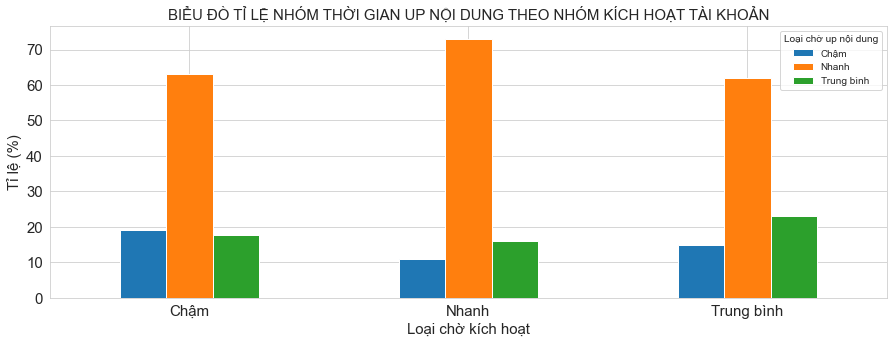

Loại chờ kích hoạt,Chậm,Nhanh,Trung bình
Loại chờ up nội dung,,,
Chậm,19.23,10.95,14.89
Nhanh,63.19,72.98,61.97
Trung bình,17.58,16.07,23.14


In [921]:
temp_table = (temp_table/temp_table.sum()*100)
temp_table.T.plot(kind='bar',figsize=(15,5))
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Loại chờ kích hoạt',fontsize=15)
plt.ylabel('Tỉ lệ (%)',fontsize=15)
plt.title('BIỂU ĐỒ TỈ LỆ NHÓM THỜI GIAN UP NỘI DUNG THEO NHÓM KÍCH HOẠT TÀI KHOẢN',fontsize=15)
plt.legend(prop={'size':10},loc='best',fancybox = True,title='Loại chờ up nội dung')
plt.show();
temp_table.style.background_gradient(cmap='coolwarm').set_precision(2)

__==> Quan sát biểu đồ trên, ta thấy rằng, tỉ lệ mà người bán được phê duyệt up nội dung sản phẩm bán hàng sớm là rất cao bất kể thời gian kích hoạt tài khoản có chậm hay nhanh.__

Đối với các sản phẩm khác nhau thì tỉ lệ này như thế nào?

In [922]:
BBFF_table = df_loc_up.loc[df_loc_up["Seller's Main Category"] == 'BBFF']
Book_table = df_loc_up.loc[df_loc_up["Seller's Main Category"] == 'Book']
DigitalService_table = df_loc_up.loc[df_loc_up["Seller's Main Category"] == 'Digital Service']
Electronic_table = df_loc_up.loc[df_loc_up["Seller's Main Category"] == 'Electronic']
LifeStyle_table = df_loc_up.loc[df_loc_up["Seller's Main Category"] == 'LifeStyle']

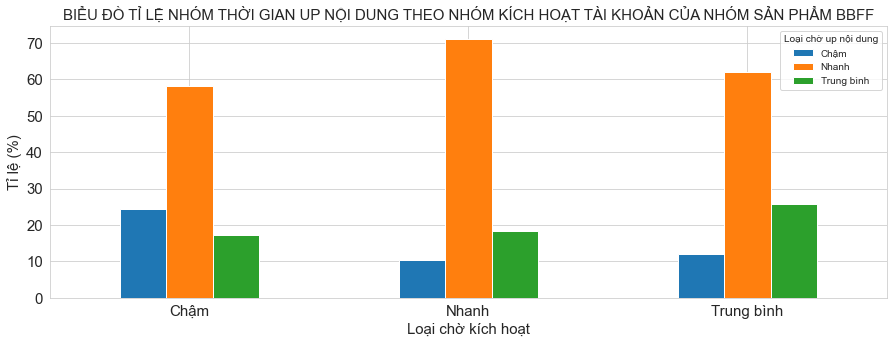

Loại chờ kích hoạt,Chậm,Nhanh,Trung bình
Loại chờ up nội dung,,,
Chậm,24.49,10.43,12.16
Nhanh,58.16,71.14,62.16
Trung bình,17.35,18.44,25.68


In [923]:
BBFF_table = pd.pivot_table(data=BBFF_table,index='Loại chờ up nội dung',columns='Loại chờ kích hoạt',values='Seller ID',aggfunc='count',
                                    fill_value=0)
BBFF_table = (BBFF_table/BBFF_table.sum()*100)
BBFF_table.T.plot(kind='bar',figsize=(15,5))  
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Loại chờ kích hoạt',fontsize=15)
plt.ylabel('Tỉ lệ (%)',fontsize=15)
plt.title('BIỂU ĐỒ TỈ LỆ NHÓM THỜI GIAN UP NỘI DUNG THEO NHÓM KÍCH HOẠT TÀI KHOẢN CỦA NHÓM SẢN PHẨM BBFF',fontsize=15)
plt.legend(prop={'size':10},loc='best',fancybox = True,title='Loại chờ up nội dung')
plt.show();
BBFF_table.style.background_gradient(cmap='coolwarm').set_precision(2)

- Thời gian chờ kích hoạt nhanh tỉ lệ người bán up nội dung sớm tương đối cao (trên 70% lượng người bán)
- Thời gian chờ kích hoạt trung bình tỉ lệ người bán up nội dung sớm tương đối (trên 60% lượng người bán)
- Thời gian chờ kích hoạt chậm tỉ lệ người bán up nội dung sớm cao (gần 60% lượng người bán) <p>
__==> vấn đề tồn đọng: Do thời gian duyệt tài khoản kích hoạt bị trì trệ nên nhiều khả năng người bán quên đi, giảm dần sự quan tâm đến thông báo tài khoản được kích hoạt nên họ mất nhiều thời gian để nhận ra điều đó => Thời gian từ ngày tk được kích hoạt đến thời gian up nội dung sản phẩm dài ra__

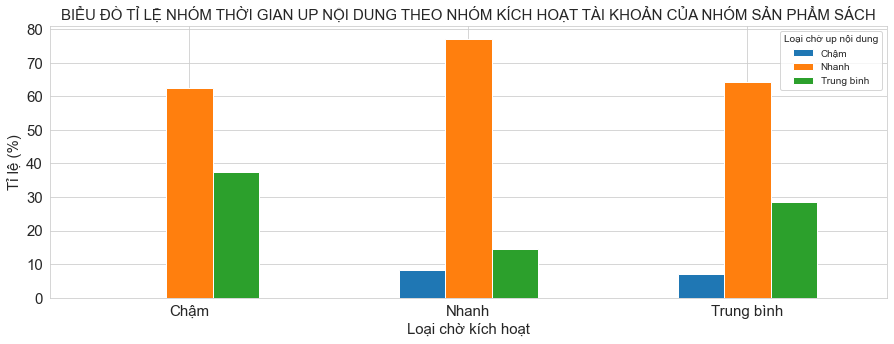

Loại chờ kích hoạt,Chậm,Nhanh,Trung bình
Loại chờ up nội dung,,,
Chậm,0.00,8.33,7.14
Nhanh,62.50,77.08,64.29
Trung bình,37.50,14.58,28.57


In [924]:
Book_table = pd.pivot_table(data=Book_table,index='Loại chờ up nội dung',columns='Loại chờ kích hoạt',values='Seller ID',aggfunc='count',
                                    fill_value=0)
Book_table = round((Book_table/Book_table.sum()*100),2)
Book_table.T.plot(kind='bar',figsize=(15,5))  
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Loại chờ kích hoạt',fontsize=15)
plt.ylabel('Tỉ lệ (%)',fontsize=15)
plt.title('BIỂU ĐỒ TỈ LỆ NHÓM THỜI GIAN UP NỘI DUNG THEO NHÓM KÍCH HOẠT TÀI KHOẢN CỦA NHÓM SẢN PHẨM SÁCH',fontsize=15)
plt.legend(prop={'size':10},loc='best',fancybox = True,title='Loại chờ up nội dung')
plt.show();
Book_table.style.background_gradient(cmap='coolwarm').set_precision(2)

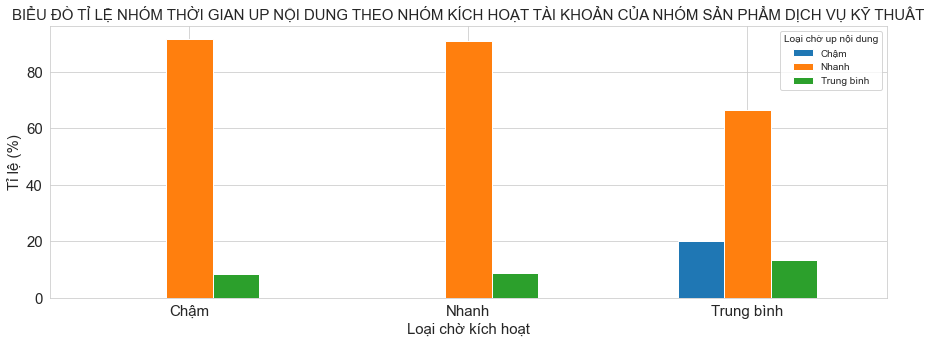

Loại chờ kích hoạt,Chậm,Nhanh,Trung bình
Loại chờ up nội dung,,,
Chậm,0.00,0.00,20.00
Nhanh,91.67,91.11,66.67
Trung bình,8.33,8.89,13.33


In [925]:
DigitalService_table = pd.pivot_table(data=DigitalService_table,index='Loại chờ up nội dung',columns='Loại chờ kích hoạt',values='Seller ID',aggfunc='count',
                                    fill_value=0)
DigitalService_table = round((DigitalService_table/DigitalService_table.sum()*100),2)
DigitalService_table.T.plot(kind='bar',figsize=(15,5))  
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Loại chờ kích hoạt',fontsize=15)
plt.ylabel('Tỉ lệ (%)',fontsize=15)
plt.title('BIỂU ĐỒ TỈ LỆ NHÓM THỜI GIAN UP NỘI DUNG THEO NHÓM KÍCH HOẠT TÀI KHOẢN CỦA NHÓM SẢN PHẨM DỊCH VỤ KỸ THUÂT',fontsize=15)
plt.legend(prop={'size':10},loc='best',fancybox = True,title='Loại chờ up nội dung')
plt.show();
DigitalService_table.style.background_gradient(cmap='coolwarm').set_precision(2)

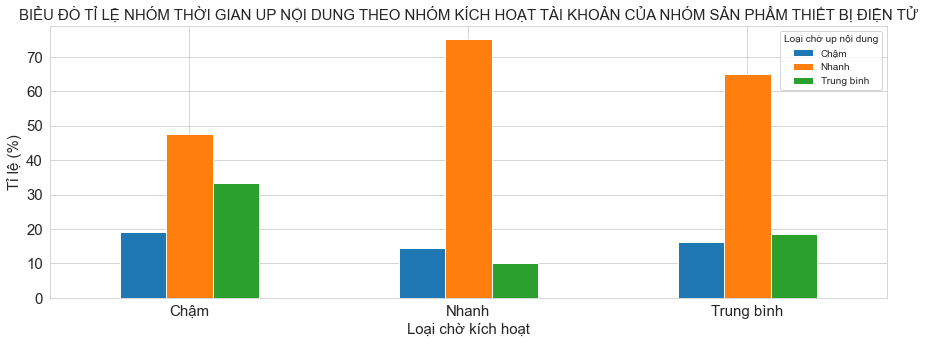

Loại chờ kích hoạt,Chậm,Nhanh,Trung bình
Loại chờ up nội dung,,,
Chậm,19.05,14.60,16.28
Nhanh,47.62,75.18,65.12
Trung bình,33.33,10.22,18.60


In [926]:
Electronic_table = pd.pivot_table(data=Electronic_table,index='Loại chờ up nội dung',columns='Loại chờ kích hoạt',values='Seller ID',aggfunc='count',
                                    fill_value=0)
Electronic_table = round((Electronic_table/Electronic_table.sum()*100),2)
Electronic_table.T.plot(kind='bar',figsize=(15,5))  
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Loại chờ kích hoạt',fontsize=15)
plt.ylabel('Tỉ lệ (%)',fontsize=15)
plt.title('BIỂU ĐỒ TỈ LỆ NHÓM THỜI GIAN UP NỘI DUNG THEO NHÓM KÍCH HOẠT TÀI KHOẢN CỦA NHÓM SẢN PHẨM THIẾT BỊ ĐIỆN TỬ',fontsize=15)
plt.legend(prop={'size':10},loc='best',fancybox = True,title='Loại chờ up nội dung')
plt.show();
Electronic_table.style.background_gradient(cmap='coolwarm').set_precision(2)

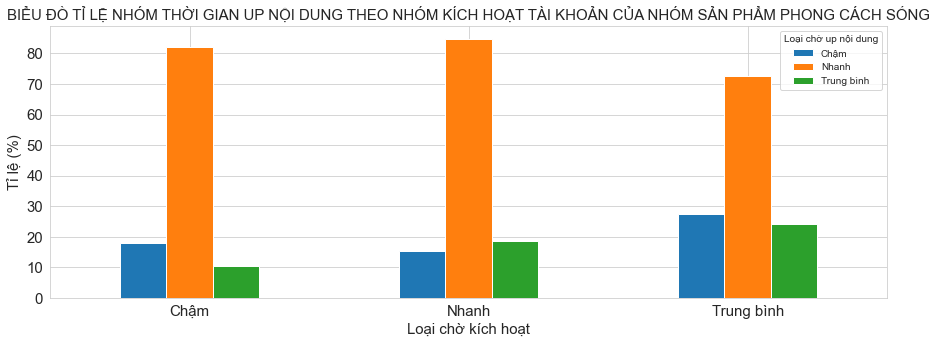

Loại chờ kích hoạt,Chậm,Nhanh,Trung bình
Loại chờ up nội dung,,,
Chậm,17.95,15.25,27.27
Nhanh,82.05,84.75,72.73
Trung bình,10.26,18.64,24.24


In [927]:
LifeStyle_table = pd.pivot_table(data=LifeStyle_table,index='Loại chờ up nội dung',columns='Loại chờ kích hoạt',values='Seller ID',aggfunc='count',
                                    fill_value=0)
LifeStyle_table = (LifeStyle_table/LifeStyle_table.shift(1).sum()*100)
LifeStyle_table.T.plot(kind='bar',figsize=(15,5))  
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Loại chờ kích hoạt',fontsize=15)
plt.ylabel('Tỉ lệ (%)',fontsize=15)
plt.title('BIỂU ĐỒ TỈ LỆ NHÓM THỜI GIAN UP NỘI DUNG THEO NHÓM KÍCH HOẠT TÀI KHOẢN CỦA NHÓM SẢN PHẨM PHONG CÁCH SỐNG',fontsize=15)
plt.legend(prop={'size':10},loc='best',fancybox = True,title='Loại chờ up nội dung')
plt.show();
LifeStyle_table.style.background_gradient(cmap='coolwarm').set_precision(2)

Nhìn chung thì tỉ lệ người bán đăng nội dung bán hàng sớm là cao (cao hơn rõ so với 2 nhóm còn lại): Từ đó ta nhìn ra được nhận thức, sự quan tâm của người bán hàng đến thời gian tài khoản được kích hoạt:
- Nhóm người bán sp phong cách sống quan tâm nhất có tỉ lệ người up nội dung bài viết sớm cao nhất (trên 70% bất kể nhóm thời gian kích hoạt nào)
- Nhóm người bán sp BBFF: khi được duyệt tài khoản sớm thì họ sẽ up nội dung sản phẩm sớm, tuy nhiên nếu thời gian duyệt mức chậm và trung bình thì tỉ lệ up sản phảm mới quanh mức 60%
- Nhóm người bán sp sách: được duyệt sớm => up nội dung sớm hoặc trung bình, tỉ lệ up chẫm là rất thấp => mức độ quan tâm là lớn
- Nhóm người bán sp dịch vụ kỹ thuật số: tỉ lệ lượng người up nội dung sớm là rất cao, bất kể thời gian kích hoạt tài khoản
- Nhóm người bán sp thiết bị điện tử: Tỉ lệ người nhận thông kích hoạt tài khoản chậm dẫn đến thời gian đăng nội dung sản phậm nhanh tỉ lệ rất thấp, gần như chia ra cho 3 nhóm thời gian. <p>
__==> Như vậy thời gian kích hoạt tải khoản cũng ảnh hưởng đến thời gian up nội dung sản phẩm, khi được duyệt sớm thì người bán hàng sẽ up nội dung sớm và việc bán hàng sẽ trở nên nhanh chóng và thuận lợi hơn => Lợi nhuận đến sớm đối với người bán và cả sàn TMDT. <p>__
__==> Việc kích hoạt tài khoản chậm khiến người dùng bỏ qua, lơ đi các thông báo kích hoạt tài khoản vì thời gian chờ quá dài => tac độngd đến tâm lý người bán <p>__
__==> Các nhóm người bán khác nhau sẽ có xu hướng quan tâm tiếp nhận thông tin kích hoạt tài khoản khác nhau dẩn đến tỉ lệ up nội dung sản phâm sớm cũng khác nhau. <p>__

### 1st Salable : Lần đầu tiên sản phẩm bắt đầu được người dùng mua được

Dữ liệu này có liên quan đến thông tin ngày mà người dùng up thông tin sản phẩm lên sàn TMDT => Thời gian người bán chuẩn bị hàng hóa 

In [928]:
df_loc_up['Thời gian chuẩn bị hàng'] = df_loc_up['1st Salable'] - df_loc_up['1st Listing']
df_loc_up['Thời gian chuẩn bị hàng'] = df_loc_up['Thời gian chuẩn bị hàng'].dt.total_seconds()/86400

Thời gian mà khách hàng mua được phải sau thời điểm sản phẩm được public thông tin lên sàn TMDT <p>
__==> Lọc ra dữ liệu ngày chuẩn bị hàng >= 0__

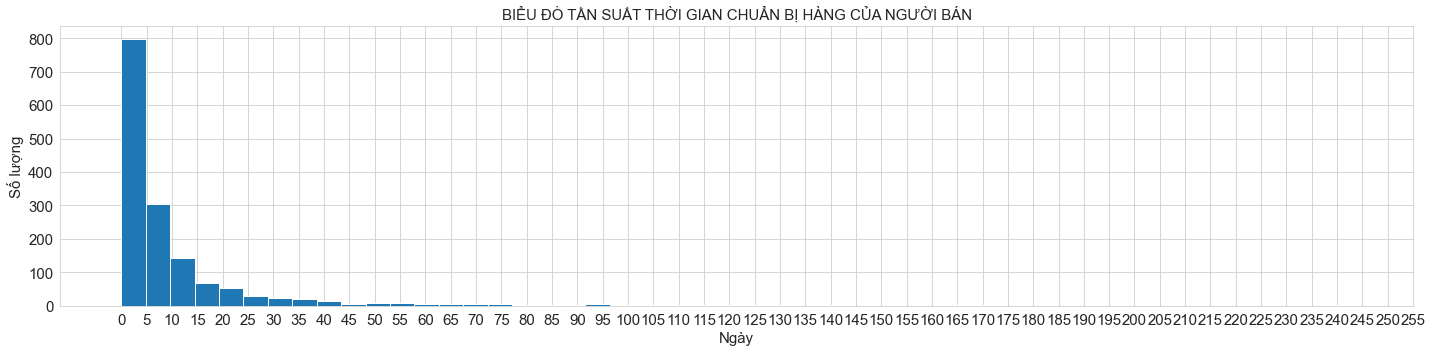

In [929]:
# Lọc dữ liệu
df_loc_cb = df_loc_up.loc[df_loc_up['Thời gian chuẩn bị hàng'] >= 0]

# Vẽ biểu đồ tần suất để hình dùng được các mốc thời gian 
plt.figure(figsize=(20,5))
plt.hist(df_loc_cb['Thời gian chuẩn bị hàng'],bins=50)
plt.xticks(np.arange(0,260,5),fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Ngày',fontsize=15)
plt.ylabel('Số lượng',fontsize=15)
plt.title('BIỂU ĐỒ TẦN SUẤT THỜI GIAN CHUẨN BỊ HÀNG CỦA NGƯỜI BÁN',fontsize=15)
plt.tight_layout();

In [930]:
round(df_loc_cb['Thời gian chuẩn bị hàng'].describe().T,2)

count    1524.00
mean       10.23
std        18.68
min         0.00
25%         1.00
50%         4.00
75%        11.00
max       241.00
Name: Thời gian chuẩn bị hàng, dtype: float64

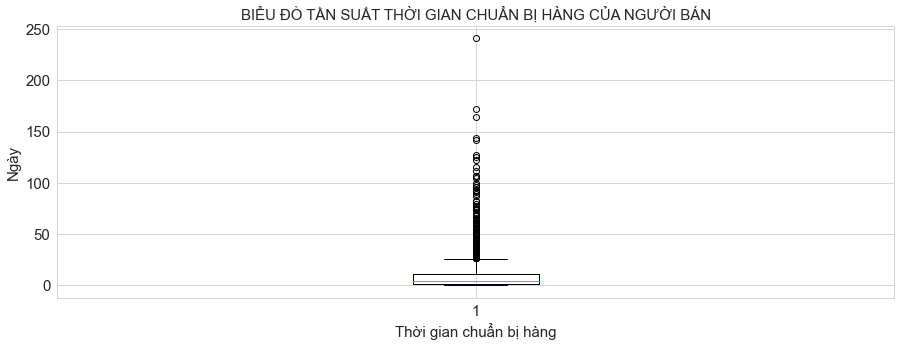

In [931]:
plt.figure(figsize=(15,5))
plt.boxplot(df_loc_cb['Thời gian chuẩn bị hàng'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Thời gian chuẩn bị hàng',fontsize=15)
plt.ylabel('Ngày',fontsize=15)
plt.title('BIỂU ĐỒ TẦN SUẤT THỜI GIAN CHUẨN BỊ HÀNG CỦA NGƯỜI BÁN',fontsize=15)
plt.show();

+ Phần lớn thời gian chuẩn bị hàng trong vòng 5 ngày kể từ ngày người bán đăng thông tin sản phẩm lên web.
+ Các giá trị dưới giá trị trung vị tập trung nhiều, ít dao động.
+ Các giá trị trên giá trị trung vị, dao động nhiều và có nhiều điểm dữ liệu ngoại lại, thời gian chuẩn bị là rất lớn

Dựa vào biểu đồ tần suất, ta chia nhóm thời gian chuẩn bị hàng thành 3 nhóm để thuận lợi cho việc phân tích:
+ Nhóm nhanh: 0-> 5 ngày 
+ Nhóm trung bình: 5-> 15 ngày
+ Nhóm chậm: > 15 ngày

In [932]:
df_loc_cb.loc[df_loc_cb['Thời gian chuẩn bị hàng'] <= 5,'Nhóm chuẩn bị hàng'] = 'Nhanh'
df_loc_cb.loc[(df_loc_cb['Thời gian chuẩn bị hàng'] > 5) & (df_loc_cb['Thời gian chuẩn bị hàng'] <= 15),'Nhóm chuẩn bị hàng'] = 'Trung bình'
df_loc_cb.loc[df_loc_cb['Thời gian chuẩn bị hàng'] > 15,'Nhóm chuẩn bị hàng'] = 'Chậm'

In [933]:
# Tìm hiểu sự khác biệt giữa 3 nhóm thời gian chuẩn bị hàng
temp_table = pd.pivot_table(data=df_loc_cb,index='Nhóm chuẩn bị hàng',values='Thời gian chuẩn bị hàng',fill_value=0,aggfunc=np.mean)
temp_table.style.background_gradient(cmap='coolwarm').set_precision(2)

,Thời gian chuẩn bị hàng
Nhóm chuẩn bị hàng,
Chậm,39.61
Nhanh,2.00
Trung bình,9.29


__==> Các nhóm chuẩn bị hàng có giá trị trung bình chệnh lệch rõ rệt__

Các nhóm sản phẩm theo thời gia chuẩn bị hàng?

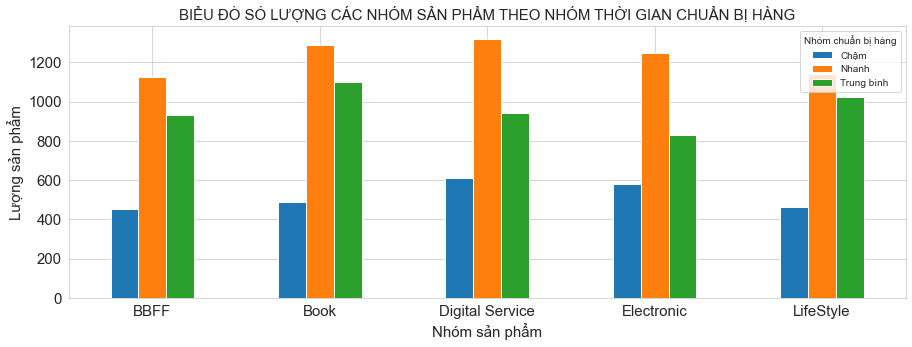

Seller's Main Category,BBFF,Book,Digital Service,Electronic,LifeStyle
Nhóm chuẩn bị hàng,,,,,
Chậm,452.93,486.67,612.50,578.84,463.71
Nhanh,1125.78,1290.23,1318.38,1248.98,1137.55
Trung bình,930.71,1100.32,943.00,830.95,1024.25


In [934]:
temp_table = pd.pivot_table(data=df_loc_cb,index='Nhóm chuẩn bị hàng',columns="Seller's Main Category",values='Seller ID',fill_value=0)

temp_table.T.plot(kind='bar',figsize=(15,5))
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Nhóm sản phẩm',fontsize=15)
plt.ylabel('Lượng sản phẩm',fontsize=15)
plt.title('BIỂU ĐỒ SỐ LƯỢNG CÁC NHÓM SẢN PHẨM THEO NHÓM THỜI GIAN CHUẨN BỊ HÀNG',fontsize=15)
plt.legend(prop={'size':10},loc='best',fancybox = True,title='Nhóm chuẩn bị hàng')
plt.show();

temp_table.style.background_gradient(cmap='coolwarm').set_precision(2)

In [935]:
# Tỉ lệ 
(temp_table/temp_table.sum()*100).style.background_gradient(cmap='coolwarm').set_precision(1)

Seller's Main Category,BBFF,Book,Digital Service,Electronic,LifeStyle
Nhóm chuẩn bị hàng,,,,,
Chậm,18.0,16.9,21.3,21.8,17.7
Nhanh,44.9,44.8,45.9,47.0,43.3
Trung bình,37.1,38.2,32.8,31.3,39.0


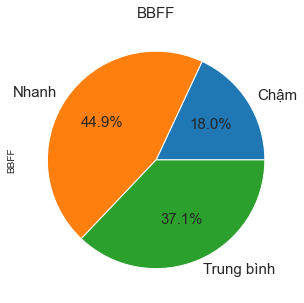

In [936]:
temp_table['BBFF'].plot.pie(figsize=(5,5),autopct='%1.1f%%',textprops={'fontsize':15})
plt.title('BBFF',fontsize=15)
plt.show()


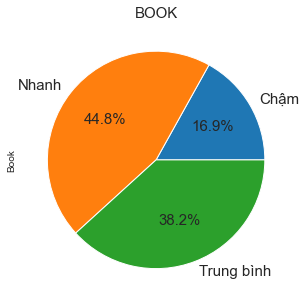

In [937]:
temp_table['Book'].plot.pie(figsize=(5,5),autopct='%1.1f%%',textprops={'fontsize':15})
plt.title('BOOK',fontsize=15)
plt.show()

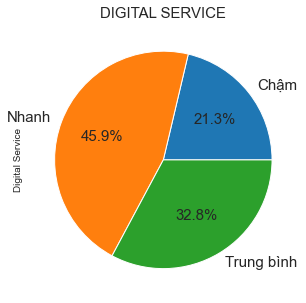

In [938]:
temp_table['Digital Service'].plot.pie(figsize=(5,5),autopct='%1.1f%%',textprops={'fontsize':15})
plt.title('DIGITAL SERVICE',fontsize=15)
plt.show()

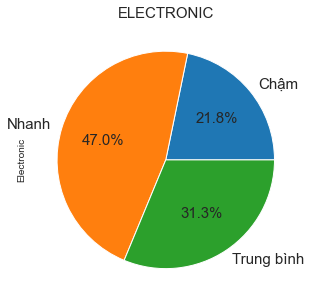

In [939]:
temp_table['Electronic'].plot.pie(figsize=(5,5),autopct='%1.1f%%',textprops={'fontsize':15})
plt.title('ELECTRONIC',fontsize=15)
plt.show()

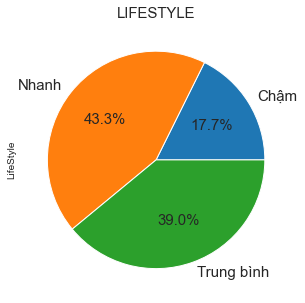

In [940]:
temp_table['LifeStyle'].plot.pie(figsize=(5,5),autopct='%1.1f%%',textprops={'fontsize':15})
plt.title('LIFESTYLE',fontsize=15)
plt.show()

Quan sát các đồ thị trên, ta thấy rằng:
+ Các nhóm hàng có thời gian chuẩn bị hàng nhanh có range từ 43->47% trên tổng số
+ Các nhóm hàng có thời gian chuẩn bị hàng trung bình có range từ 31->39% trên tổng số
+ Các nhóm hàng có thời gian chuẩn bị hàng trung bình có range từ 17->22% trên tổng số <p>
==> Nhóm người bán chuẩn bị hàng nhanh chiếm đa số nhưng tỉ lệ này là không cao (khá thấp) khi không một nhóm mặt hàng nào trên 50% trên tổng số <p>
==> Tỉ lệ trung bình gần bằng tỉ lệ nhanh <p>
==> Tỉ lệ chậm vẫn còn khá cao (trên 10%) <p>
__==> Việc chuẩn bị hàng chậm ảnh hưởng rất lơn đến uy tín cũng như sự hài lòng của khách hàng, để giải quyết vấn đề này thì sự chủ động nằm ở người bán. Để có được lợi cho người bán và sàn TMDT thì 2 bên cần có những sự chuẩn bị tốt để đáp ứng được nhu cầu khách hàng__

Khảo sát nhóm chuẩn bị hàng và nhóm up nội dung sản phẩm?

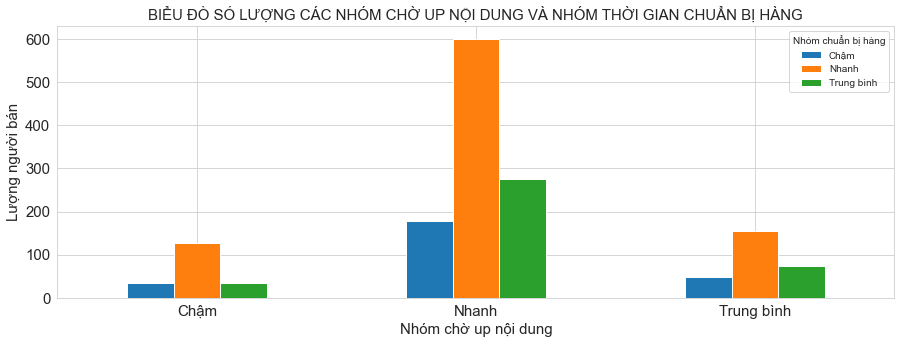

Loại chờ up nội dung,Chậm,Nhanh,Trung bình
Nhóm chuẩn bị hàng,,,
Chậm,34,177,48
Nhanh,127,600,154
Trung bình,35,276,73


In [941]:
temp_table = pd.pivot_table(data=df_loc_cb,index='Nhóm chuẩn bị hàng',columns='Loại chờ up nội dung',values='Seller ID',aggfunc='count',
                                fill_value=0)
temp_table.T.plot(kind='bar',figsize=(15,5))
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Nhóm chờ up nội dung',fontsize=15)
plt.ylabel('Lượng người bán',fontsize=15)
plt.title('BIỂU ĐỒ SỐ LƯỢNG CÁC NHÓM CHỜ UP NỘI DUNG VÀ NHÓM THỜI GIAN CHUẨN BỊ HÀNG',fontsize=15)
plt.legend(prop={'size':10},loc='best',fancybox = True,title='Nhóm chuẩn bị hàng')
plt.show();

temp_table.style.background_gradient(cmap='coolwarm')

==> Quan sát biểu đồ trên, ta thấy rằng người bán có thời gian up nội dung sớm hay muộn thì việc chuẩn bị hàng nhanh là điều cần có đối với người bán, tuy nhiên số lượng trung bình và chậm là không ít.

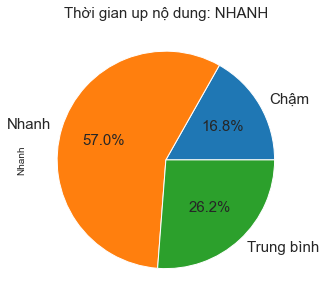

In [942]:
temp_table['Nhanh'].plot.pie(figsize=(5,5),autopct='%1.1f%%',textprops={'fontsize':15})
plt.title('Thời gian up nộ dung: NHANH',fontsize=15)
plt.show()

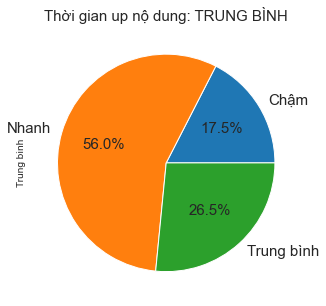

In [943]:
temp_table['Trung bình'].plot.pie(figsize=(5,5),autopct='%1.1f%%',textprops={'fontsize':15})
plt.title('Thời gian up nộ dung: TRUNG BÌNH',fontsize=15)
plt.show()

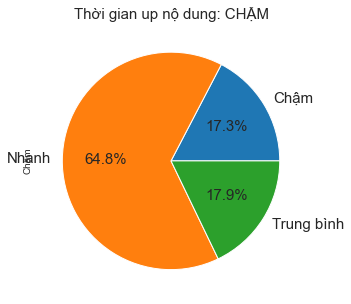

In [944]:
temp_table['Chậm'].plot.pie(figsize=(5,5),autopct='%1.1f%%',textprops={'fontsize':15})
plt.title('Thời gian up nộ dung: CHẬM',fontsize=15)
plt.show()

In [945]:
((temp_table/temp_table.sum())*100).style.background_gradient(cmap='coolwarm').set_precision(2)

Loại chờ up nội dung,Chậm,Nhanh,Trung bình
Nhóm chuẩn bị hàng,,,
Chậm,17.35,16.81,17.45
Nhanh,64.80,56.98,56.00
Trung bình,17.86,26.21,26.55


+ Việc chuẩn bị hàng tốt cho đơn hàng đầu tiên là điều cần thiết trong thương mại bán hàng, tuy vậy tỉ lệ chuẩn bị hàng nhanh đang ở mức thấp.
+ Ở mức chậm vẫn cao (trên 10%)
+ Điều đặc biệt là đối với nhóm người bán up nội dung sản phẩm chậm lại có tỉ lệ chuẩn bị hàng cao nhất với 65%, cho thấy sự nhận thức của họ thay đổi, thể hiện sự quan tâm nhiều hơn. <p>
__=> Đối với các món hàng khác nhau thì tỉ lệ chuẩn bị hàng cũng sẽ khác nhau nhưng chúng ko có sự khác biệt lơn, chênh lệch vài % và tỉ lệ chuẩn bị hàng chậm vận còn cao. <p>__
__==> Ta ko có tập dữ liệu chi tiết về từng sản phẩm nên không thể đánh giá được lí do tại sao việc chuẩn bị hàng kéo dài mà chỉ suy luận theo hướng chủ quan từ người bán hàng__

### 1st Transaction: Ngày mà người bán phát sinh giao dịch đầu tiên

Ngày phát sinh giao dịch đầu tiên là thời điểm mà những đơn hàng đâu tiên được bán ra, thông số này sẽ được so sánh với thời điểm chuẩn bị hàng xong. <p>
+ Đâu là nhóm mặt hàng sớm hơn?


In [946]:
df_loc_cb['Thời gian chờ giao dịch'] = df_loc_cb['1st Transaction'] - df_loc_cb['1st Salable']
df_loc_cb['Thời gian chờ giao dịch'] = df_loc_cb['Thời gian chờ giao dịch'].dt.total_seconds()/86400
df_loc_cb = df_loc_cb.loc[df_loc_cb['Thời gian chờ giao dịch'] >= 0]

round(df_loc_cb['Thời gian chờ giao dịch'].describe(),0)

count    1435.0
mean       12.0
std        20.0
min         0.0
25%         1.0
50%         4.0
75%        12.0
max       193.0
Name: Thời gian chờ giao dịch, dtype: float64

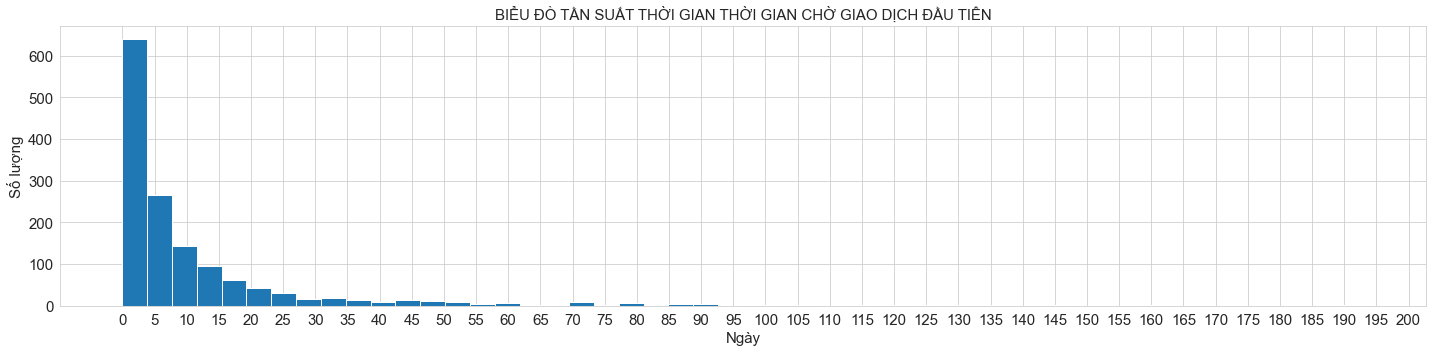

In [947]:
plt.figure(figsize=(20,5))
plt.hist(df_loc_cb['Thời gian chờ giao dịch'],bins=50)
plt.xticks(np.arange(0,205,5),fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Ngày',fontsize=15)
plt.ylabel('Số lượng',fontsize=15)
plt.title('BIỂU ĐỒ TẦN SUẤT THỜI GIAN THỜI GIAN CHỜ GIAO DỊCH ĐẦU TIÊN',fontsize=15)
plt.tight_layout();

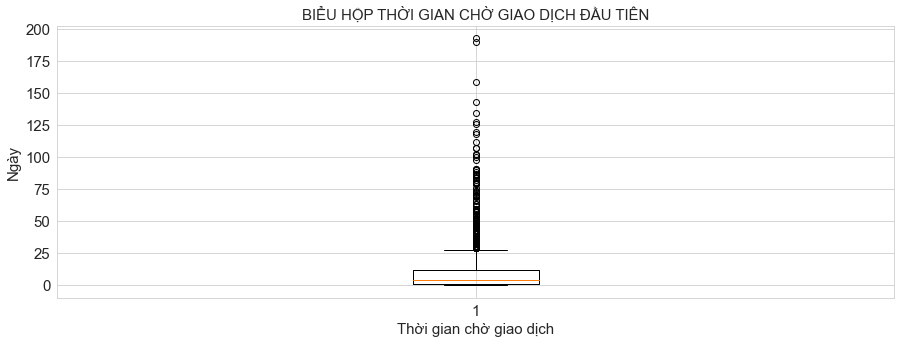

In [948]:
plt.figure(figsize=(15,5))
plt.boxplot(df_loc_cb['Thời gian chờ giao dịch'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Thời gian chờ giao dịch',fontsize=15)
plt.ylabel('Ngày',fontsize=15)
plt.title('BIỂU HỘP THỜI GIAN CHỜ GIAO DỊCH ĐẦU TIÊN',fontsize=15)
plt.show();

+ Phần lớn thì các giao dịch đầu tiên của người bán nằm trong khoảng 5 ngày đầu tiên
+ Tồn tại các giao dịch ngoại lai khá lớn với thời điểm giao dịch cách xa ngày chuẩn bị hàng hơn nửa năm

Đâu là nhóm sản phẩm có thời gian giao dịch sớm nhất?

In [949]:
temp_table = pd.pivot_table(data=df_loc_cb,index="Seller's Main Category",values='Thời gian chờ giao dịch',aggfunc=[np.mean,np.std],fill_value=0)
temp_table.style.background_gradient(cmap='coolwarm').set_precision(2)

,mean,std
,Thời gian chờ giao dịch,Thời gian chờ giao dịch
Seller's Main Category,,
BBFF,9.41,15.60
Book,6.17,12.91
Digital Service,25.72,31.83
Electronic,14.24,22.67
LifeStyle,13.33,24.20


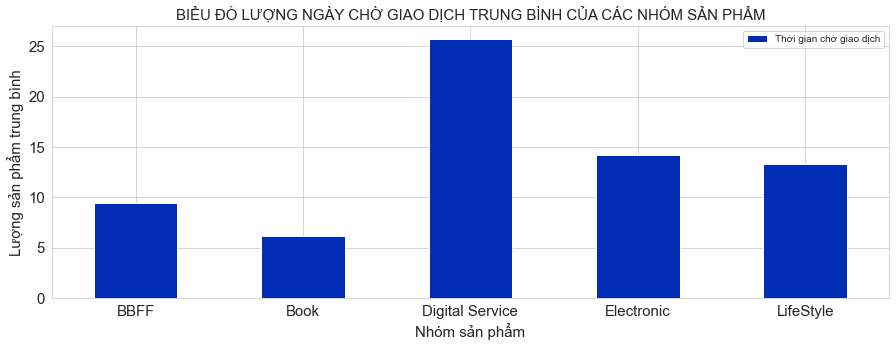

In [950]:
temp_table['mean'].plot(kind='bar',figsize=(15,5),color='#002db3')
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Nhóm sản phẩm',fontsize=15)
plt.ylabel('Lượng sản phẩm trung bình',fontsize=15)
plt.title('BIỂU ĐỒ LƯỢNG NGÀY CHỜ GIAO DỊCH TRUNG BÌNH CỦA CÁC NHÓM SẢN PHẨM',fontsize=15)
#plt.legend(prop={'size':10},loc='best',fancybox = True,title='Nhóm chuẩn bị hàng')
plt.show()

Nhóm sách có số ngày giao dịch trung bình sớm nhất, saud đó là nhóm BBFF, electronic, lifestyle và cuối cùng là dịch vụ kỹ thuật số. <p>
__==> Những giao dịch đầu tiên khá ngẫu nhiên nên ta không thể đánh giá được nhóm hàng nào là phổ biến, hấp dẩn và mang lại doanh thu lớn.__


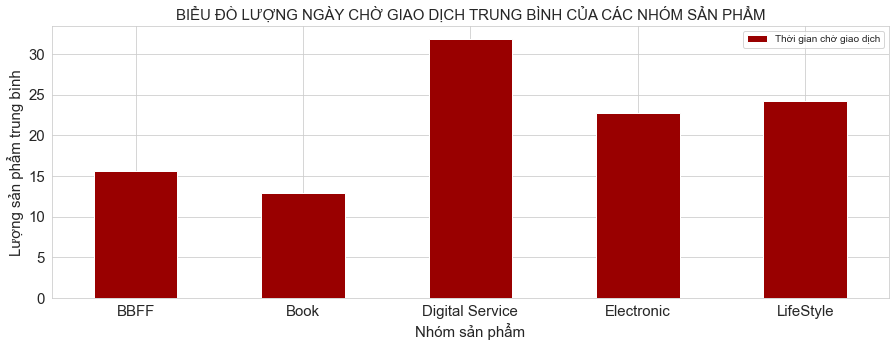

In [951]:
temp_table['std'].plot(kind='bar',figsize=(15,5),color='#990000')
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Nhóm sản phẩm',fontsize=15)
plt.ylabel('Lượng sản phẩm trung bình',fontsize=15)
plt.title('BIỂU ĐỒ LƯỢNG NGÀY CHỜ GIAO DỊCH TRUNG BÌNH CỦA CÁC NHÓM SẢN PHẨM',fontsize=15)
#plt.legend(prop={'size':10},loc='best',fancybox = True,title='Nhóm chuẩn bị hàng')
plt.show()

+ Các điểm dữ liệu giao dịch của nhóm hàng sách thấp nhất, dữ liệu có tính tập trung hơn so với các mặt hàng khác.
+ Digital Service là nhóm hàng có độ lệch chuẩn cao nhất, thể thiện sự rời rạc, trải dài nhiều mốc thời gian thừ ngắn đến dài. <p>
__==> Nhóm mặt hàng như sách và BBFF, có thể do tỉ lệ người mua mặt hàng này cao nên lần phát sinh giao dịch đầu thường đến sớm hơn so với các mặt hàng khác __

### Phân tích tương quan giữa các yếu tố 

In [952]:
corr = df_loc_cb[['Thời gian kích hoạt','Thời gian chờ up nội dung','Thời gian chuẩn bị hàng','Thời gian chờ giao dịch']]
corr = corr.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Thời gian kích hoạt,Thời gian chờ up nội dung,Thời gian chuẩn bị hàng,Thời gian chờ giao dịch
Thời gian kích hoạt,1.00,0.12,0.06,0.03
Thời gian chờ up nội dung,0.12,1.00,0.02,-0.03
Thời gian chuẩn bị hàng,0.06,0.02,1.00,-0.06
Thời gian chờ giao dịch,0.03,-0.03,-0.06,1.00


__=> Các thông số thời gian ít có sự tác động qua lại, không thể hiện tính tương quan nào rõ nét.__ <p>
Tuy nhiên ta cần để ý 1 số điểm nhỏ sau:
+ Thời gian kích hoạt tỉ lệ thuận với thời gian up nội dung sản phẩm

# Kết luận

## Những điểm cần lưu tâm

+ Tình hình kinh doanh phát triển mạnh từ tháng 3 đến tháng 9, tuy nhiên đến sức tăng ở tháng 9 giảm (tăng 56%)
+ Thời gian kích hoạt tài khoản ở mức chậm (trên 30 ngày) còn nhiều (tỉ lệ 15%), tỉ lệ này đang giảm theo thời gian và cần nhiều thời gian hơn để lảm rõ liệu có duy trì ổn định dưới 5% hay không. Các nhóm mặt hàng khác nhau có tỉ lệ chậm khác nhau, đứng đầu là BBFF và thấp nhất là Book
+ Tỉ lệ người bán up nội dung sản phẩm chậm còn nhiều và nó phụ thuộc vào thời gian thông tháo kích hoạt tài khoản, người bán có thời gian chờ kích hoạt càng lâu thì tỉ lệ up hình sớm giảm đi và chậm tăng lên => Sự quan tâm giảm đi.
+ Thời gia chuẩn bị hàng còn chậm đối với tất cả các mặt hàng (Nhanh dưới 50%, chậm trên 15%), tuy nhiên đối với những người bán up nội dung sản phẩm chậm thì họ lại chuận bị hàng nhanh hơn nhóm nhanh và trung bình gần 10%.
+ Sách là nhóm sản phẩm phát sinh gia dịch đầu tiên sớm nhât kể từ ngày sản phẩm được chuẩn bị, cuối cùng là dịch vụ kỹ thuật số.

### Hướng phát triển

+ Cần lên kế hoạch marketing nhằm tăng lượng người bán cũng như kích cầu người mua, triễn khai các cuộc khảo sát chi tiết hơn để nhìn ra sự phát triển về cả doanh thu và sự hài lòng từ khách hàng, từ đó đánh mạnh vào sự uy tín, tin cậy mà người dùng cần.
+ Cần rút ngắn thời gian chờ kích hoạt tài khoản lại vì nó tác động nhẹ đến thời gian chuẩn bị hàng làm ảnh hưởng đế công tác chuẩn bị của người bán thông qua việc thông báo trong thời gian dưới 5 ngày (khoảng thời gian mà người bán hàng quan tâm nhiều nhất đến thông báo kích hoạt). Trên phương diện khách hàng thì họ không muốn mất nhiều thời gian và người bán cũng không mong sản phẩm đầu tiên bán ra bị đán giá thấp.
+ Cần tạo ra một danh mục hướng dẩn bán hàng thông tin đến người hàng kĩ hơn những điều cần làm đối với việc bán hàng online nhằm tạo nên sự nhanh chóng, tiện lợi nhất có thể cả người bán và người mua ==> Quyết định đến chất lượng, uy tín đến sàn TMDT.

### Hạn chế

- Tính chính xác chưa cao, xuất hiện nhiều outlier (có thể đây và vấn đề có thật trogn thực tế)
- Dữ liệu ít về nội dung nên chưa khai thác được hết thông tin đối với một sàn TMDT